## DECISION TREE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

### TASK 1- DATA PREPARATION

In [2]:
data = {
    'Age': [25, 45, 35, 50, 23, 37, 32, 28, 40, 27, 48, 29, 33, 42, 24, 30, 46, 39, 31, 36] * 5,
    'Salary': [50000, 100000, 75000, 120000, 45000, 80000, 60000, 52000, 95000, 48000, 
               115000, 53000, 72000, 105000, 46000, 62000, 110000, 85000, 68000, 78000] * 5,
    'Department': ['Sales', 'IT', 'IT', 'HR', 'Sales', 'HR', 'IT', 'Sales', 'HR', 'Sales',
                   'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'IT', 'Sales', 'IT'] * 5,
    'Purchased': [0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1] * 5
}
df = pd.DataFrame(data)

In [3]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Age,Salary,Department,Purchased
0,25,50000,Sales,0
1,45,100000,IT,1
2,35,75000,IT,1
3,50,120000,HR,1
4,23,45000,Sales,0


### TASK 2- EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
print("Data Information")
print(df.info())
print("Missing Values")
print(df.isnull().sum())

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         100 non-null    int64 
 1   Salary      100 non-null    int64 
 2   Department  100 non-null    object
 3   Purchased   100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None
Missing Values
Age           0
Salary        0
Department    0
Purchased     0
dtype: int64


In [5]:
# Visualizations
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Salary Distribution')

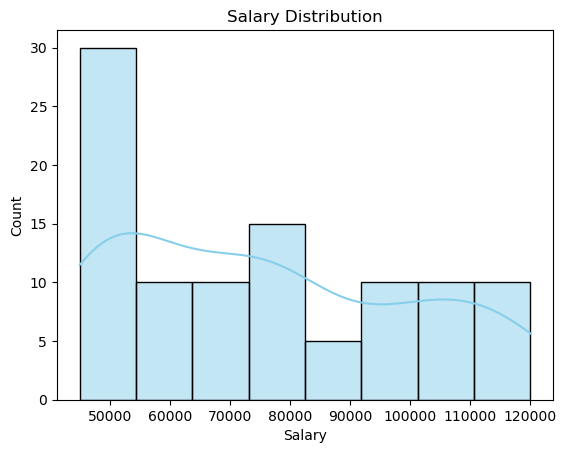

In [6]:
# Histogram
plt.subplot(1, 1, 1)
sns.histplot(df['Salary'], kde=True, color='skyblue')
plt.title('Salary Distribution')

Text(0.5, 1.0, 'Age vs Purchased')

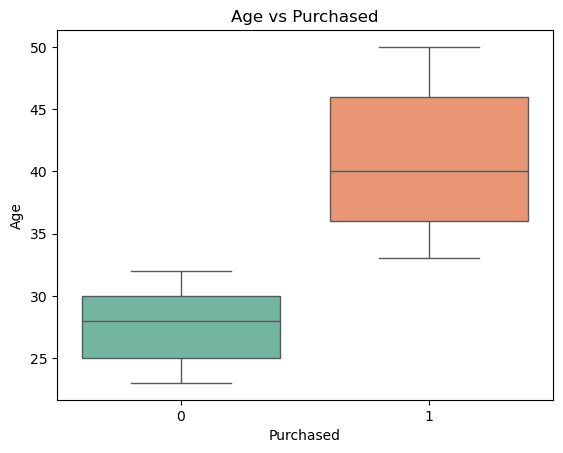

In [7]:
# Box Plot
plt.subplot(1, 1, 1)
sns.boxplot(x='Purchased', y='Age', data=df, palette='Set2')
plt.title('Age vs Purchased')

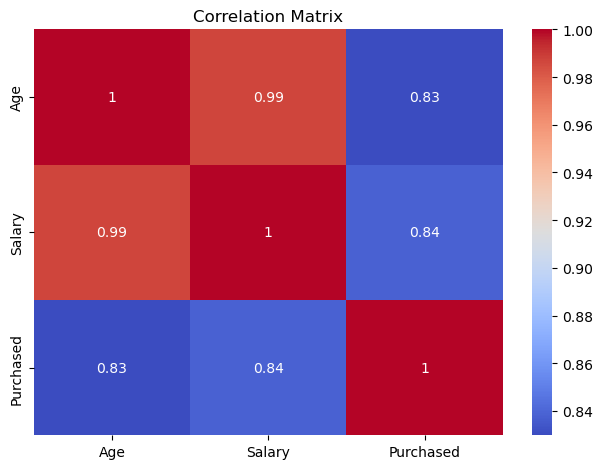

In [8]:
# Correlation Matrix
plt.subplot(1, 1, 1)
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

### TASK 3- FEATURE ENGINEERING

In [9]:
# Using One-Hot Encoding for the 'Department' column
df_encoded = pd.get_dummies(df, columns=['Department'], drop_first=True)

In [10]:
# Define Features (X) and Target (y)
X = df_encoded.drop('Purchased', axis=1)
y = df_encoded['Purchased']

### TASK 4- DECISION TREE CLASSIFICATION

In [13]:
# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:

# Predictions
y_pred = dt_model.predict(X_test)

In [20]:
# Evaluate Initial Model
print("Initial Model Performance")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Initial Model Performance
Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### TASK 5- HYPERPARAMETER TUNING

In [21]:
# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [22]:
# GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Hyperparameters Found")
print(grid_search.best_params_)

Best Hyperparameters Found
{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


### TASK 6- MODEL EVALUATION AND ANALYSIS

In [23]:
y_pred_tuned = best_model.predict(X_test)

print("Tuned Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_tuned))

Tuned Model Performance
Accuracy: 1.0
ROC-AUC Score: 1.0


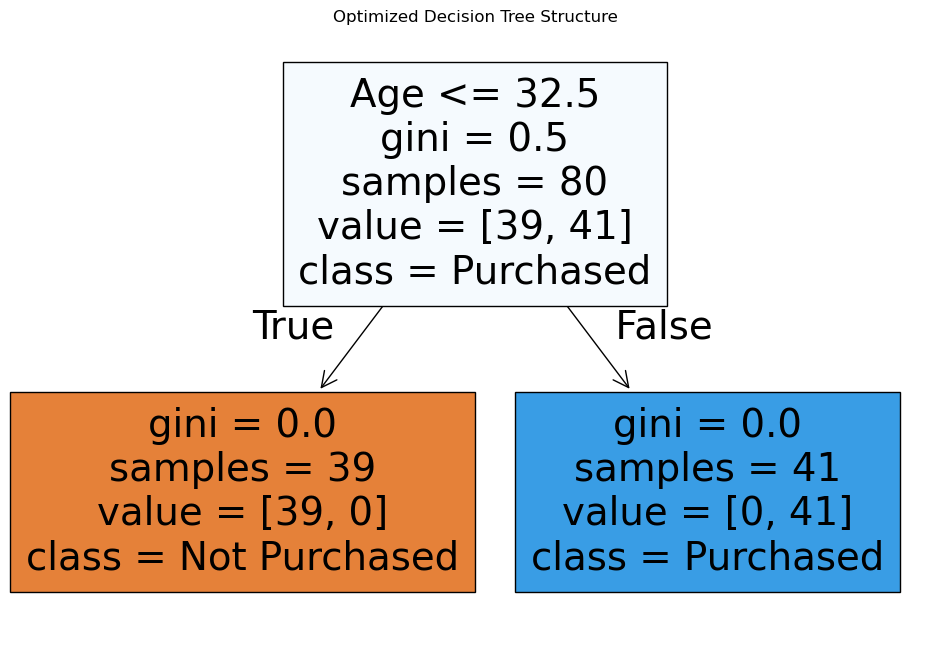

In [24]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(best_model, feature_names=X.columns.tolist(), class_names=['Not Purchased', 'Purchased'], filled=True)
plt.title("Optimized Decision Tree Structure")
plt.show()

In [25]:
# Feature Importance
importances = pd.Series(best_model.feature_importances_, index=X.columns)
print("\nFeature Importance:\n", importances.sort_values(ascending=False))


Feature Importance:
 Age                 1.0
Salary              0.0
Department_IT       0.0
Department_Sales    0.0
dtype: float64


# INTERVIEW QUESTIONS ANSWERS
1. What are some common hyperparameters of decision tree models?
   - Max Depth- Limits how deep the tree can grow. Prevents overfitting by simplifying the model.
   - Min Samples Split- The minimum samples required to split a node. Higher values prevent the model from learning noise.
   - Criterion (Gini vs Entropy)- The function used to measure the quality of a split.
    

2. What is the difference between Label encoding and One-hot encoding?
   - Label Encoding- Converts categories into numbers (0, 1, 2). Useful for ordinal data (ranked). Can confuse models if data is not ranked.
   - One-Hot Encoding- Creates a new binary column for each category. Useful for nominal data (no order, example colors, departments).